Es una técnica que lo que hace es reducir la complejidad de los datos, manteniendo la mayor cantidad posible de la variación original. Un ejemplo es con el dataset Iris, el cual tiene un conjunto de datos sobre flores como el largo y ancho del pétalo, largo y ancho del sépalo, y con toda esta información vamos a tratar de organizar las flores en distintos grupos, haciendo que las flores similares queden juntas, si quisiéramos ver las agrupaciones en un gráfico tendríamos el problema que para cada flor tenemos 4 medidas y el gráfico solo puede dividir la información con 2 medidas, ahí entra el PCA creando dos nuevas medidas principales que reúnan la complejidad de las diferentes dimensiones originales. Las nuevas medidas se van a llamar componentes principales, ya que no son medidas directas como el largo del pétalo, sino que son combinaciones de esas 4 medidas que nos van a dar las diferencias más grandes que hay entre las flores.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

In [2]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [15]:
X = iris.data
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [16]:
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Después de cargar el Data Set debe de pasar por un proceso de **estandarización**.

¿Qué es la estandarización?

No es más que un proceso para resolver un problema intrínseco de nuestros datos. Supón que tienes una colección de reglas: unas en centímetros y otras en pulgadas, y quieres compararlas o hallar un patrón, lo primero que debes hacer es convertirlas a una misma unidad, ya sea a centímetros, pulgadas o a una nueva unidad. Esto es un poco de lo que vamos hacemos cuando estandarizamos los datos en estadística, pero en vez de cambiar unidades, lo que hacemos es ajustar las medidas para que todas empiecen desde el mismo punto, porque estas medidas empiezan y terminan en distintos puntos, y queremos que tengan la misma longitud de diferencia en sus valores.

In [10]:
X_centrado = X - np.mean(X, axis=0) # es el resultado de restarle al DataFrame el promedio del DataFrame

In [11]:
pca = PCA(n_components=2) # el es numero de componentes principales que se desean hacer

In [14]:
X_pca = pca.fit_transform(X_centrado) # entrenamiento del modelo

In [7]:
especies = ['setosa', 'versicolor', 'virginica']

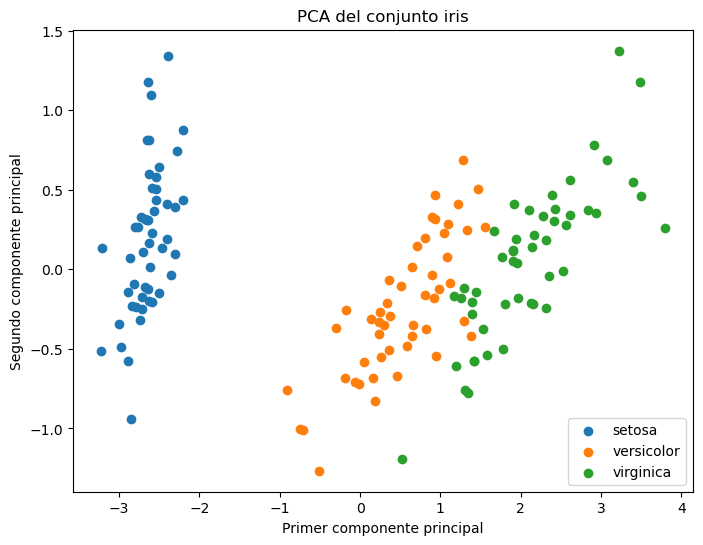

In [17]:
plt.figure(figsize=(8, 6))
for i in range(0, 3):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=especies[i]) # y == i, busca que i sea el mismo que target para separar por especies
                                                                       # y toma los valores correspondientes
plt.xlabel('Primer componente principal')
plt.ylabel('Segundo componente principal')
plt.title('PCA del conjunto iris')
plt.legend();